# Implementasi Naıve Bayes dan Gini Index untuk Klasifikasi Email Spam

# 1. Insialisasi

Memasukan semua modul/library

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold
import gita as ga
import gitb as gb
import gitc as gc
import mnnb
import selectkbestindex as sk
import preprocessing
import evaluation
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score

# 2. Memasukan Dataset

Data berupa enron spam Email yang telah diberi label spam dan ham (bukan spam) 

In [3]:
e6 = pd.read_csv('csv/enron6.csv', encoding='latin-1')
e5 = pd.read_csv('csv/enron5.csv', encoding='latin-1')
e4 = pd.read_csv('csv/enron4.csv', encoding='latin-1')
e3 = pd.read_csv('csv/enron3.csv', encoding='latin-1')
e2 = pd.read_csv('csv/enron2.csv', encoding='latin-1')
e1 = pd.read_csv('csv/enron1.csv', encoding='latin-1')
alldata = pd.concat([e1,e2,e3,e4,e5,e6],ignore_index=True)

In [6]:
print("Ukuran data 1 ", e1.shape)
print("Ukuran data 2 ", e2.shape)
print("Ukuran data 3 ", e3.shape)
print("Ukuran data 4 ", e4.shape)
print("Ukuran data 5 ", e5.shape)
print("Ukuran data 6 ", e6.shape)

Ukuran data 1  (5172, 2)
Ukuran data 2  (5857, 2)
Ukuran data 3  (5512, 2)
Ukuran data 4  (6000, 2)
Ukuran data 5  (5175, 2)
Ukuran data 6  (6000, 2)


Ukuran semua data

In [7]:
alldata.shape

(33716, 2)

In [21]:
alldata.head(10)

,Kelas,Email
0,ham,Subject: christmas tree farm pictures\n
1,ham,"Subject: vastar resources , inc .\ngary , prod..."
2,ham,Subject: calpine daily gas nomination\n- calpi...
3,ham,Subject: re : issue\nfyi - see note below - al...
4,ham,Subject: meter 7268 nov allocation\nfyi .\n- -...
5,ham,"Subject: mcmullen gas for 11 / 99\njackie ,\ns..."
6,ham,"Subject: meter 1517 - jan 1999\ngeorge ,\ni ne..."
7,ham,Subject: duns number changes\nfyi\n- - - - - -...
8,ham,Subject: king ranch\nthere are two fields of g...
9,ham,Subject: re : entex transistion\nthanks so muc...


Melihat contoh Email dari data yang ke 5

In [9]:
print(alldata['Email'][5])

Subject: mcmullen gas for 11 / 99
jackie ,
since the inlet to 3 river plant is shut in on 10 / 19 / 99 ( the last day of
flow ) :
at what meter is the mcmullen gas being diverted to ?
at what meter is hpl buying the residue gas ? ( this is the gas from teco ,
vastar , vintage , tejones , and swift )
i still see active deals at meter 3405 in path manager for teco , vastar ,
vintage , tejones , and swift
i also see gas scheduled in pops at meter 3404 and 3405 .
please advice . we need to resolve this as soon as possible so settlement
can send out payments .
thanks


### Mengetahui perbandingan Email spam dan bukan spam

spam    17171
ham     16545
Name: Kelas, dtype: int64

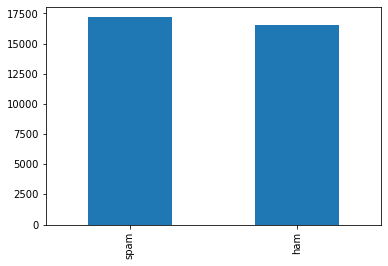

In [10]:
alldata['Kelas'].value_counts().plot(kind='bar');
alldata['Kelas'].value_counts()

# 3. Preprocessing

In [11]:
X = alldata['Email']
y = alldata['Kelas']

In [26]:
X = X.astype(str)

In [12]:
%%time
ps = preprocessing
#Xpr = ps.preprocessing(X)
Xpr = ps.cleaner(X)

Wall time: 6.89 s


In [13]:
Xpr

0                     subject christmas tree farm pictures
1        subject vastar resources gary production from ...
2        subject calpine daily nomination calpine daily...
3        subject issue note below already done stella  ...
4        subject meter allocation  forwarded lauri alle...
                               ...                        
33711    subject  good news edaliss edumm eoggra hello ...
33712    subject prescript medicines special precise bu...
33713    subject next generation online pharmacy ready ...
33714    subject bloow times timelearn last times longe...
33715    subject dear interested need some softwares gi...
Length: 33716, dtype: object

In [14]:
Xpr = Xpr.replace('enron','', regex=True)
Xpr = Xpr.replace('subject','', regex=True)

In [15]:
%%time
Xpr = ps.tokenisasi(Xpr)

Wall time: 1.53 s


In [16]:
Xpr

0                        [christmas, tree, farm, pictures]
1        [vastar, resources, gary, production, from, hi...
2        [calpine, daily, nomination, calpine, daily, n...
3        [issue, note, below, already, done, stella, fo...
4        [meter, allocation, forwarded, lauri, allen, k...
                               ...                        
33711    [good, news, edaliss, edumm, eoggra, hello, we...
33712    [prescript, medicines, special, precise, bucks...
33713    [next, generation, online, pharmacy, ready, ro...
33714    [bloow, times, timelearn, last, times, longer,...
33715    [dear, interested, need, some, softwares, give...
Length: 33716, dtype: object

In [17]:
%%time
Xpr = ps.lemmatizing(Xpr)

Wall time: 22.3 s


In [18]:
Xpr

0                         [christmas, tree, farm, picture]
1        [vastar, resource, gary, production, from, hig...
2        [calpine, daily, nomination, calpine, daily, n...
3        [issue, note, below, already, done, stella, fo...
4        [meter, allocation, forwarded, lauri, allen, k...
                               ...                        
33711    [good, news, edaliss, edumm, eoggra, hello, we...
33712    [prescript, medicine, special, precise, buck, ...
33713    [next, generation, online, pharmacy, ready, ro...
33714    [bloow, time, timelearn, last, time, longer, r...
33715    [dear, interested, need, some, software, give,...
Length: 33716, dtype: object

In [19]:
%%time
Xpr = ps.stopwordsremove(Xpr)

Wall time: 529 ms


In [20]:
Xpr

0                         [christmas, tree, farm, picture]
1        [vastar, resource, gary, production, high, isl...
2        [calpine, daily, nomination, calpine, daily, n...
3        [issue, note, already, done, stella, forwarded...
4        [meter, allocation, forwarded, lauri, allen, k...
                               ...                        
33711    [good, news, edaliss, edumm, eoggra, hello, we...
33712    [prescript, medicine, special, precise, buck, ...
33713    [next, generation, online, pharmacy, ready, ro...
33714    [bloow, time, timelearn, last, time, longer, r...
33715    [dear, interested, need, software, give, link,...
Length: 33716, dtype: object

In [21]:
%%time
Xpr = ps.stemming(Xpr)

Wall time: 1min 36s


In [22]:
Xpr

0                           [christma, tree, farm, pictur]
1        [vastar, resourc, gari, product, high, island,...
2             [calpin, daili, nomin, calpin, daili, nomin]
3        [issu, note, alreadi, done, stella, forward, s...
4        [meter, alloc, forward, lauri, allen, kimberli...
                               ...                        
33711    [good, news, edaliss, edumm, eoggra, hello, we...
33712    [prescript, medicin, special, precis, buck, ba...
33713    [next, gener, onlin, pharmaci, readi, rock, ri...
33714    [bloow, time, timelearn, last, time, longer, r...
33715    [dear, interest, need, softwar, give, link, ht...
Length: 33716, dtype: object

In [23]:
spam = Xpr[y == 'spam']
ham = Xpr[y == 'ham']

In [24]:
spam.head(10)

3672    [dobmeo, energi, level, gone, stukmintroducing...
3673    [prescript, readi, oxwq, cost, prescript, medi...
3674    [peopl, nowth, weather, climat, particular, en...
3675    [await, responsedear, partner, team, govern, o...
3676    [coca, cola, mbna, america, nascar, partner, o...
3677    [emerg, small, exit, addit, mail, press, zupym...
3678    [patch, work, better, pillzworld, first, derma...
3679    [paliourg, udtih, wcwknoanopktgood, morn, pali...
3680    [real, product, real, peopl, dont, wast, time,...
3681    [ter, yhvqbvdboevkcdbriababhdpr, frdjvdbesk, c...
dtype: object

In [25]:
spam_words = pd.Series(' '.join(spam.astype(str)).lower().split("', '")).value_counts()[:20]
ham_words = pd.Series(' '.join(ham.astype(str)).lower().split("', '")).value_counts()[:20]

<AxesSubplot:>

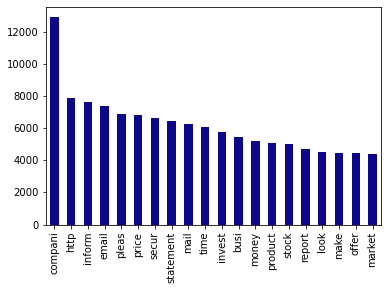

In [26]:
spam_words.plot(kind='bar',stacked=True, colormap='plasma')

<AxesSubplot:>

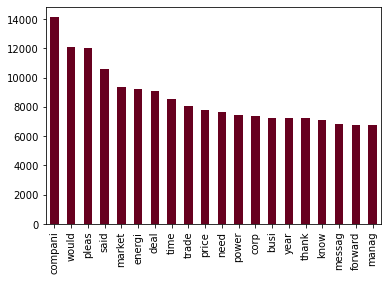

In [27]:
ham_words.plot(kind='bar',stacked=True, colormap='RdGy')

In [28]:
X_term = ps.document_term_freq(Xpr)

In [29]:
v = DictVectorizer()
X = v.fit_transform(X_term)
bb = v.get_feature_names()
y = y.values

In [30]:
X.shape

(33716, 182814)

In [31]:
len(X[1, :].toarray()[0])

182814

# 4. Fitur Seleksi dan Klasifikasi dengan MNNB
Fitur Seleksi yang duganakan menggunakan fitur seleksi [Complete Gini Index Text](https://ieeexplore.ieee.org/document/5542893/)

In [32]:
bf = 80000
SK = sk.selectkbestindex(k=bf)

In [33]:
GT = ga.gita(alpha=0)
gita = GT.fit(X,y)
indices = SK.get(gita)
XGITA = X[:, indices]
XGITA.shape

(33716, 80000)

In [34]:
gita[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
type(bb)

list

In [36]:
nama = pd.DataFrame(bb)
gitapos = pd.DataFrame(gita[0])
gitaposjoin = pd.concat([nama, gitapos], axis=1, join='inner')

In [37]:
gitaposjoin.columns = ['fitur', 'score']

In [38]:
gitascorepos = gitaposjoin.sort_values(['score'],ascending=False)
gitascorepos[:20]

,fitur,score
57255,firmnatur,0.25
152587,suggesthav,0.25
51049,equestlnm,0.25
51046,equationrefer,0.25
152583,suggestbegin,0.25
152584,suggestedincent,0.25
152585,suggestedonc,0.25
152586,suggestedthat,0.25
51039,equallyimport,0.25
51543,esay,0.25


In [39]:
gitaneg = pd.DataFrame(gita[1])
gitanegjoin = pd.concat([nama, gitaneg], axis=1, join='inner')
gitanegjoin.columns = ['fitur', 'score']
gitascoreneg = gitanegjoin.sort_values(['score'],ascending=False)
gitascoreneg[:20]

,fitur,score
0,aaa,0.25
105789,nbtnsbpa,0.25
105787,nbtalbslz,0.25
105785,nbsp,0.25
105783,nbrxfg,0.25
105782,nbrrhwfsmbrvabqhkxwb,0.25
105781,nbrrabpd,0.25
105778,nbox,0.25
105777,nbotiofi,0.25
105776,nbnd,0.25


In [40]:
GT = gb.gitb(alpha=0.5)
gitb = GT.fit(X,y)
indices = SK.get(gitb)
XGITB = X[:, indices]
XGITB.shape

(33716, 80000)

In [41]:
gitbpos = pd.DataFrame(gitb[0])
gitbposjoin = pd.concat([nama, gitbpos], axis=1, join='inner')
gitbposjoin.columns = ['fitur', 'score']
gitbscorepos = gitbposjoin.sort_values(['score'],ascending=False)
gitbscorepos[:20]

,fitur,score
92580,losemoney,0.183673
104728,mwage,0.183673
145787,sladana,0.183673
145786,slackthat,0.183673
145777,slaboszewicz,0.183673
145754,skymind,0.183673
145745,skylab,0.183673
79353,invaluableasset,0.183673
145738,skydivespaceland,0.183673
38557,debatedynegi,0.183673


In [42]:
gitbneg = pd.DataFrame(gitb[1])
gitbnegjoin = pd.concat([nama, gitbneg], axis=1, join='inner')
gitbnegjoin.columns = ['fitur', 'score']
gitbscoreneg = gitbnegjoin.sort_values(['score'],ascending=False)
gitbscoreneg[:20]

,fitur,score
91407,lkef,0.183673
91597,lmogen,0.183673
91610,lmsxfr,0.183673
91608,lmrtnhlr,0.183673
91607,lmrheiu,0.183673
91606,lmpotenc,0.183673
91605,lmpkkw,0.183673
91602,lmoz,0.183673
91601,lmou,0.183673
91600,lmotion,0.183673


In [43]:
GT = gc.gitc(alpha=0.5)
gitc = GT.fit(X,y)
indices = SK.get(gitc)
XGITC = X[:, indices]
XGITC.shape

(33716, 80000)

In [44]:
gitcpos = pd.DataFrame(gitc[0])
gitcposjoin = pd.concat([nama, gitcpos], axis=1, join='inner')
gitcposjoin.columns = ['fitur', 'score']
gitcscorepos = gitcposjoin.sort_values(['score'],ascending=False)
gitcscorepos[:20]

,fitur,score
46137,dynegi,0.124977
84096,kaminski,0.124977
101540,mmbtu,0.124950
38076,dbcap,0.124947
72531,hourahead,0.124938
55176,fastow,0.124923
178595,xgate,0.124919
55887,ferc,0.124918
34289,counterparti,0.124901
24911,cera,0.124893


In [45]:
gitcneg = pd.DataFrame(gitc[1])
gitcnegjoin = pd.concat([nama, gitcneg], axis=1, join='inner')
gitcnegjoin.columns = ['fitur', 'score']
gitcscoreneg = gitcnegjoin.sort_values(['score'],ascending=False)
gitcscoreneg[:20]

,fitur,score
169845,viagra,0.124929
27110,ciali,0.124905
31049,computron,0.124899
171234,voip,0.124890
105785,nbsp,0.124860
112096,ook,0.124860
119061,photoshop,0.124855
75951,inciud,0.124845
175030,wiil,0.124835
178251,wysak,0.124823


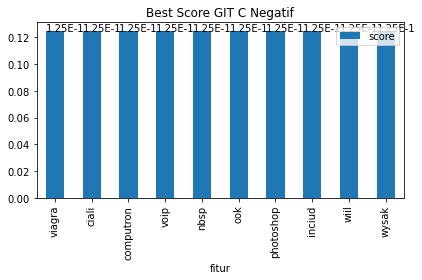

In [46]:
from decimal import Decimal
ax=gitcscoreneg[:10].plot(kind='bar',x='fitur',y='score',title='Best Score GIT C Negatif')
for p in ax.patches:
    ax.annotate('{:.2E}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.tight_layout()
plt.show()

In [47]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
chi = SelectKBest(chi2, k=bf)
chi.fit(X, y)
XCHI = X[:, chi.get_support()]
XCHI.shape

(33716, 80000)

In [48]:
kf = KFold(n_splits=6,shuffle=True)
#kf.get_n_splits(XGITA)

print(kf) 

KFold(n_splits=6, random_state=None, shuffle=True)


In [49]:
%%time
f1gita=[]
accgita=[]
cek = []
for train_index, test_index in kf.split(XGITA):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = XGITA[train_index], XGITA[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    xtrain = X_train
    xtest = X_test
    
    clf = mnnb.mnnb()
    clf.fit(xtrain, y_train)
    yp = clf.predict(xtest)
    yt = preprocessing.label_ke_numerik(y_test)
    from sklearn.metrics import f1_score
    f1gita.append(f1_score(yt,yp)*100)
    accgita.append(accuracy_score(yt,yp)*100)
    cek.append(train_index)
    
print("f1 Score ", np.mean(f1gita))
print("acc gita", np.mean(accgita))

TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [   11    12    14 ... 33703 33705 33712]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    4     5     8 ... 33697 33699 33701]
TRAIN: [    0     2     4 ... 33713 33714 33715] TEST: [    1     3    34 ... 33688 33698 33710]
TRAIN: [    1     2     3 ... 33711 33712 33715] TEST: [    0    24    27 ... 33707 33713 33714]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    6     9    13 ... 33689 33693 33708]
TRAIN: [    0     1     3 ... 33712 33713 33714] TEST: [    2     7    10 ... 33709 33711 33715]
f1 Score  86.55120192678062
acc gita 85.93249380332827
Wall time: 26.7 s


In [50]:
%%time
f1gitb=[]
accgitb=[]
for train_index, test_index in kf.split(XGITB):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = XGITB[train_index], XGITB[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xtrain = X_train
    xtest = X_test
    
    clf = mnnb.mnnb()
    clf.fit(xtrain, y_train)
    yp = clf.predict(xtest)
    yt = preprocessing.label_ke_numerik(y_test)
    
    f1gitb.append(f1_score(yt,yp)*100)
    accgitb.append(accuracy_score(yt,yp)*100)
print("CV Score is ", np.mean(f1gitb))

TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    3     4     6 ... 33703 33706 33711]
TRAIN: [    0     1     3 ... 33710 33711 33714] TEST: [    2    21    23 ... 33712 33713 33715]
TRAIN: [    1     2     3 ... 33713 33714 33715] TEST: [    0    13    15 ... 33702 33704 33705]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    5     8     9 ... 33684 33691 33692]
TRAIN: [    0     1     2 ... 33712 33713 33715] TEST: [    7    17    22 ... 33700 33708 33714]
TRAIN: [    0     2     3 ... 33713 33714 33715] TEST: [    1    10    11 ... 33694 33695 33710]
CV Score is  48.890240308288405
Wall time: 27.3 s


In [51]:
%%time
f1gitc=[]
accgitc=[]
getindex=[]
for train_index, test_index in kf.split(XGITC):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = XGITC[train_index], XGITC[test_index]
    getindex.append(train_index)
    y_train, y_test = y[train_index], y[test_index]

    xtrain = X_train
    xtest = X_test
    
    clf = mnnb.mnnb()
    clf.fit(xtrain, y_train)
    yp = clf.predict(xtest)
    yt = preprocessing.label_ke_numerik(y_test)
    
    f1gitc.append(f1_score(yt,yp)*100)
    accgitc.append(accuracy_score(yt,yp)*100)
    
print("CV Score is ", np.mean(f1gitc))

TRAIN: [    0     1     3 ... 33713 33714 33715] TEST: [    2     9    19 ... 33709 33711 33712]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    6     8    16 ... 33684 33689 33700]
TRAIN: [    1     2     3 ... 33712 33713 33714] TEST: [    0     5    22 ... 33708 33710 33715]
TRAIN: [    0     2     3 ... 33712 33714 33715] TEST: [    1     7    11 ... 33703 33705 33713]
TRAIN: [    0     1     2 ... 33712 33713 33715] TEST: [    3    10    12 ... 33691 33704 33714]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    4    13    17 ... 33697 33701 33702]
CV Score is  98.23357835213983
Wall time: 26.9 s


In [52]:
%%time
f1chi=[]
accchi=[]
for train_index, test_index in kf.split(XCHI):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = XCHI[train_index], XCHI[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xtrain = X_train
    xtest = X_test
    
    clf = mnnb.mnnb()
    clf.fit(xtrain, y_train)
    yp = clf.predict(xtest)
    yt = preprocessing.label_ke_numerik(y_test)
    
    f1chi.append(f1_score(yt,yp)*100)
    accchi.append(accuracy_score(yt,yp)*100)
    
print("CV Score is ", np.mean(f1chi))

TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    8    13    16 ... 33698 33706 33709]
TRAIN: [    1     2     4 ... 33712 33714 33715] TEST: [    0     3     6 ... 33694 33700 33713]
TRAIN: [    0     2     3 ... 33712 33713 33715] TEST: [    1     5     9 ... 33699 33704 33714]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [   21    24    27 ... 33697 33702 33710]
TRAIN: [    0     1     3 ... 33713 33714 33715] TEST: [    2    14    33 ... 33705 33707 33712]
TRAIN: [    0     1     2 ... 33712 33713 33714] TEST: [    4    10    11 ... 33708 33711 33715]
CV Score is  98.09540213628809
Wall time: 27.3 s


In [53]:
X3000=X[:,:]

In [54]:
%%time
f1scores=[]
accscores=[]
for train_index, test_index in kf.split(X3000):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X3000[train_index], X3000[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xtrain = X_train
    xtest = X_test
    
    clf = mnnb.mnnb()
    clf.fit(xtrain, y_train)
    yp = clf.predict(xtest)
    yt = preprocessing.label_ke_numerik(y_test)
    #scores.append(evaluation.f1(yt,yp))
    f1scores.append(f1_score(yt,yp)*100)
    accscores.append(accuracy_score(yt,yp)*100)
print("CV Score is ", np.mean(f1scores))

TRAIN: [    0     3     4 ... 33712 33713 33714] TEST: [    1     2     5 ... 33707 33710 33715]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [   13    16    20 ... 33702 33705 33708]
TRAIN: [    0     1     2 ... 33712 33713 33715] TEST: [   10    12    22 ... 33709 33711 33714]
TRAIN: [    1     2     4 ... 33712 33714 33715] TEST: [    0     3     6 ... 33700 33701 33713]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    7    17    19 ... 33703 33706 33712]
TRAIN: [    0     1     2 ... 33713 33714 33715] TEST: [    4     9    11 ... 33686 33690 33699]
CV Score is  98.00798668683484
Wall time: 1min 25s


## Rangkuman Hasil

In [55]:
hasilf1 = pd.DataFrame({'GIT A' : np.round(f1gita,2), 'GIT B' : np.round(f1gitb,2), 'GIT C' : np.round(f1gitc,2), 'CHI2' : np.round(f1chi,2), 'Tanpa Fitur Seleksi': np.round(f1scores,2)})
print(hasilf1)
hasilf1.mean(axis=0)

   GIT A  GIT B  GIT C   CHI2  Tanpa Fitur Seleksi
0  86.50  49.66  98.27  97.92                97.99
1  86.73  48.23  98.23  98.14                97.92
2  86.64  48.82  98.41  98.13                98.19
3  85.53  48.97  98.44  98.29                97.73
4  87.31  49.40  98.15  97.78                98.39
5  86.61  48.26  97.90  98.32                97.84


GIT A                  86.553333
GIT B                  48.890000
GIT C                  98.233333
CHI2                   98.096667
Tanpa Fitur Seleksi    98.010000
dtype: float64

In [56]:
hasilakurasi = pd.DataFrame({'GIT A' : np.round(accgita,2), 'GIT B' : np.round(accgitb,2), 'GIT C' : np.round(accgitc,2), 'CHI2' : np.round(accchi,2), 'Tanpa Fitur Seleksi': np.round(accscores,2)})
print(hasilakurasi)
hasilakurasi.mean(axis=0)

   GIT A  GIT B  GIT C   CHI2  Tanpa Fitur Seleksi
0  85.69  47.26  98.24  97.90                97.95
1  86.21  46.71  98.22  98.13                97.88
2  86.14  46.04  98.38  98.11                98.18
3  84.75  46.89  98.40  98.26                97.74
4  86.71  47.14  98.13  97.70                98.36
5  86.10  46.65  97.88  98.29                97.76


GIT A                  85.933333
GIT B                  46.781667
GIT C                  98.208333
CHI2                   98.065000
Tanpa Fitur Seleksi    97.978333
dtype: float64

## Mengetahui Kelipatan 5000 fitur dari semua fitur

In [57]:
kf = KFold(n_splits=6,shuffle=True)

In [58]:
akurasia = []
f1a = []
kindexa =[]
K = range(1,12475)
for pp in K:
    pp*=100
    GT = ga.gita(alpha=0.5)
    gita = GT.fit(X,y)
    SK = sk.selectkbestindex(k=pp)
    indices = SK.get(gita)
    XGITA = X[:, indices]
    XGITA.shape
    kf.get_n_splits(XGITA)
    scoresgita=[]
    scoresf1a=[]
    for train_index, test_index in kf.split(XGITA):
        X_train, X_test = XGITA[train_index], XGITA[test_index]
        y_train, y_test = y[train_index], y[test_index]

        xtrain = X_train
        xtest = X_test

        clf = mnnb.mnnb()
        clf.fit(xtrain, y_train)
        yp = clf.predict(xtest)
        yt = preprocessing.label_ke_numerik(y_test)

        scoresgita.append(accuracy_score(yt, yp)*100)
        scoresf1a.append(f1_score(yt,yp)*100)
    akurasia.append(np.mean(scoresgita))
    f1a.append(np.mean(scoresf1a))
    kindexa.append(pp)
    print(pp)
    if pp >= 12475:
        print("selesai")
        break;

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
selesai


In [59]:
np.max(akurasia)

96.36670891022389

In [60]:
akurasia

[73.74244086271436,
 77.3371971093669,
 80.65308993359886,
 82.95766439784353,
 83.81482913526109,
 85.1405806895221,
 85.64185242959564,
 86.16383850167739,
 86.68583987939581,
 87.66166763461625,
 88.12433855899435,
 88.38238578775578,
 88.7145671872061,
 89.01413280268163,
 90.34287634502239,
 90.43478774881952,
 90.53862382692851,
 90.6483573251827,
 90.81148691199176,
 91.20000836004431,
 91.36017815338867,
 91.45214233524327,
 92.07202800952622,
 92.1194955388819,
 92.25885758305633,
 92.3715735693399,
 92.430895578191,
 92.60587278334798,
 92.63553827390841,
 92.74230775645333,
 92.79867999967065,
 93.09822978172895,
 93.18722308672682,
 93.21686377160022,
 93.24653506774696,
 93.27620108608797,
 93.55201657568786,
 93.58465347088564,
 93.78633056755201,
 93.8159865580621,
 93.89607673254001,
 94.17485465450746,
 94.20156246272548,
 94.24607336529994,
 94.28461770847385,
 94.43585692670837,
 94.4566425090942,
 94.48036255147707,
 94.48926462643585,
 94.53375230666501,
 94.575291

In [61]:
%%time
akurasib = []
f1b = []
kindexb =[]
K = range(1,12475)
for pp in K:
    pp*=100
    GT = gb.gitb(alpha=0.1)
    gitb = GT.fit(X,y)
    SK = sk.selectkbestindex(k=pp)
    indices = SK.get(gitb)
    XGITB = X[:, indices]
    XGITB.shape
    kf.get_n_splits(XGITB)
    scoresgitb=[]
    scoresf1b=[]
    for train_index, test_index in kf.split(XGITB):
        X_train, X_test = XGITB[train_index], XGITB[test_index]
        y_train, y_test = y[train_index], y[test_index]

        xtrain = X_train
        xtest = X_test

        clf = mnnb.mnnb()
        clf.fit(xtrain, y_train)
        yp = clf.predict(xtest)
        yt = preprocessing.label_ke_numerik(y_test)

        scoresgitb.append(accuracy_score(yt, yp)*100)
        scoresf1b.append(f1_score(yt,yp)*100)
    akurasib.append(np.mean(scoresgitb))
    f1b.append(np.mean(scoresf1b))
    kindexb.append(pp)
    print(pp)
    if pp >= 12475:
        print("selesai")
        break;

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
selesai
Wall time: 6min 10s


In [62]:
np.max(akurasib)

50.69107588492441

In [63]:
akurasib

[50.69107588492441,
 50.57536263275529,
 50.50423258909939,
 50.42416722030848,
 50.4182164943252,
 50.424162998063885,
 50.35593574757056,
 50.341115669024155,
 50.32031108653765,
 50.21949285775659,
 50.16015026546307,
 50.112702791769244,
 50.05930142540867,
 50.03264270078409,
 49.97031867602232,
 49.87838932768565,
 49.82500326696175,
 49.738977144356646,
 49.63517906644905,
 49.587778565226394,
 49.56101428448682,
 49.51061229513405,
 49.46613833719985,
 49.38305248017815,
 49.39494232097207,
 49.326675486935635,
 49.24964960647625,
 49.22589261945311,
 49.20809480290245,
 49.15470768661741,
 49.13397541006967,
 49.10726232404588,
 49.086515797422614,
 49.02718270517945,
 48.96490776401115,
 48.855160543461984,
 48.778026995765295,
 48.781036928384616,
 48.76915975432447,
 48.71273842751366,
 48.73061435558942,
 48.69496013884429,
 48.69200615096593,
 48.67127229107647,
 48.582250485927574,
 48.57934294273982,
 48.525946854185,
 48.448800639754495,
 48.36578814423272,
 48.3538861

In [64]:
%%time
akurasic = []
f1c=[]
kindexc =[]
K = range(1,12475)
for pp in K:
    pp*=100
    GT = gc.gitc(alpha=0.1)
    gitc = GT.fit(X,y)
    SK = sk.selectkbestindex(k=pp)
    indices = SK.get(gitc)
    XGITC = X[:, indices]
    XGITC.shape
    kf.get_n_splits(XGITC)
    scoresgitc=[]
    scoresf1c=[]
    for train_index, test_index in kf.split(XGITC):
        X_train, X_test = XGITC[train_index], XGITC[test_index]
        y_train, y_test = y[train_index], y[test_index]

        xtrain = X_train
        xtest = X_test

        clf = mnnb.mnnb()
        clf.fit(xtrain, y_train)
        yp = clf.predict(xtest)
        yt = preprocessing.label_ke_numerik(y_test)

        scoresgitc.append(accuracy_score(yt, yp)*100)
        scoresf1c.append(f1_score(yt,yp)*100)
    akurasic.append(np.mean(scoresgitc))
    f1c.append(np.mean(scoresf1c))
    kindexc.append(pp)
    print(pp)
    if pp >= 12475:
        print("selesai")
        break;

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
selesai
Wall time: 6min 11s


In [65]:
np.max(akurasic)

93.69438327467581

In [66]:
np.max(f1c)

94.15825772704409

In [67]:
%%time
akurasichi = []
f1chi=[]
kindexchi =[]
K = range(1,12475)
for pp in K:
    pp*=100
    chi = SelectKBest(chi2, k=pp)
    chi.fit(X, y)
    XCHI = X[:, chi.get_support()]
    XCHI.shape
    kf.get_n_splits(XCHI)
    scoreschi=[]
    scoresf1chi=[]
    for train_index, test_index in kf.split(XCHI):
        X_train, X_test = XCHI[train_index], XCHI[test_index]
        y_train, y_test = y[train_index], y[test_index]

        xtrain = X_train
        xtest = X_test

        clf = mnnb.mnnb()
        clf.fit(xtrain, y_train)
        yp = clf.predict(xtest)
        yt = preprocessing.label_ke_numerik(y_test)

        scoreschi.append(accuracy_score(yt, yp)*100)
        scoresf1chi.append(f1_score(yt,yp)*100)
    akurasichi.append(np.mean(scoreschi))
    f1chi.append(np.mean(scoresf1chi))
    kindexchi.append(pp)
    print(pp)
    if pp >= 12475:
        print("selesai")
        break;

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
selesai
Wall time: 8min 17s


In [68]:
np.max(akurasichi)

97.51157158910719

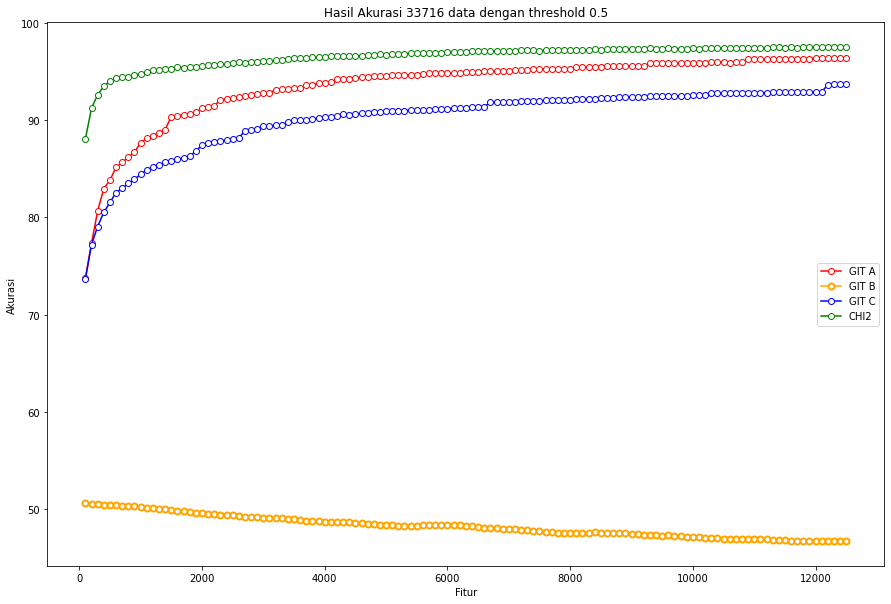

In [69]:
plt.figure(figsize=(15,10))
plt.plot(kindexa, akurasia,'-ok', label = "GIT A", color='red',
         markeredgecolor='red',
         markerfacecolor='white',) 
plt.plot(kindexb, akurasib, '-ok', label = "GIT B", color='orange',
         markeredgecolor='orange',
         markerfacecolor='white',
         markeredgewidth=2) 
plt.plot(kindexc, akurasic,'-ok', label = "GIT C", color='blue',
         markeredgecolor='blue',
         markerfacecolor='white',)
plt.plot(kindexchi, akurasichi,'-ok', label = "CHI2", color='green',
         markeredgecolor='green',
         markerfacecolor='white',) 
# naming the x axis 
plt.xlabel('Fitur')
# naming the y axis 
plt.ylabel('Akurasi') 
# giving a title to my graph 
plt.title('Hasil Akurasi 33716 data dengan threshold 0.5') 
# show a legend on the plot 
plt.legend()
# function to show the plot 
plt.show() 

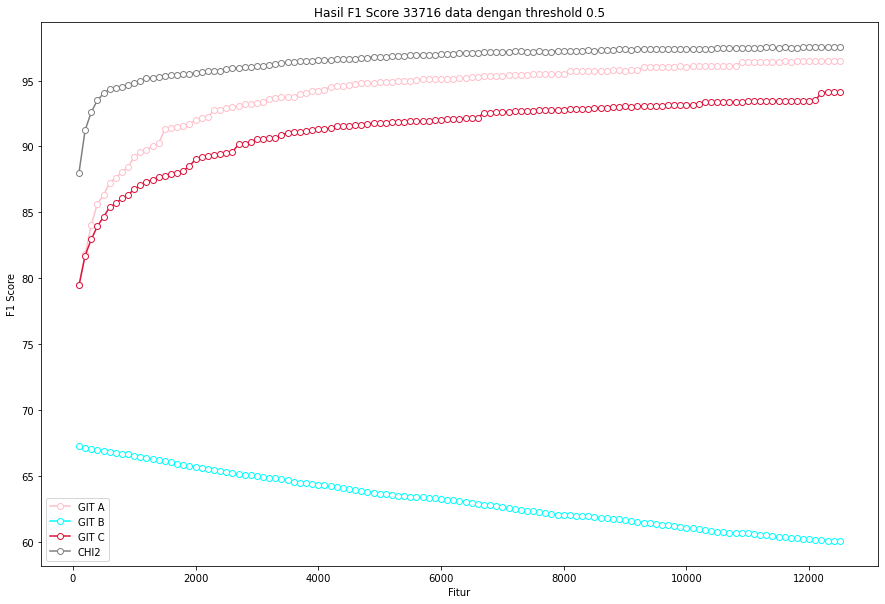

In [70]:
plt.figure(figsize=(15,10))
plt.plot(kindexa, f1a,'-ok', label = "GIT A", color='pink',markeredgecolor='pink',markerfacecolor='white') 
plt.plot(kindexb, f1b, '-ok', label = "GIT B", color='cyan',markeredgecolor='cyan',markerfacecolor='white') 
plt.plot(kindexc, f1c,'-ok', label = "GIT C", color='crimson',markeredgecolor='crimson',markerfacecolor='white')
plt.plot(kindexchi, f1chi,'-ok', label = "CHI2", color='gray',markeredgecolor='gray',markerfacecolor='white')
# naming the x axis 
plt.xlabel('Fitur') 
# naming the y axis 
plt.ylabel('F1 Score') 
# giving a title to my graph 
plt.title('Hasil F1 Score 33716 data dengan threshold 0.5') 
# show a legend on the plot 
plt.legend()
# function to show the plot 
plt.show() 

# Tanpa GIT B

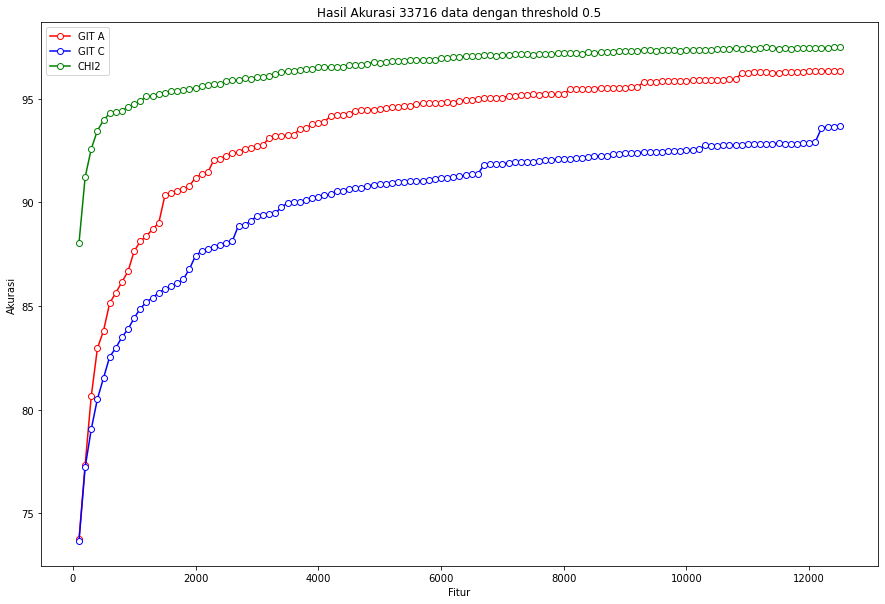

In [71]:
plt.figure(figsize=(15,10))
plt.plot(kindexa, akurasia,'-ok', label = "GIT A", color='red',markeredgecolor='red',markerfacecolor='white') 
#plt.plot(kindexb, akurasib, '-ok', label = "GIT B", color='orange',markeredgecolor='orange',markerfacecolor='white') 
plt.plot(kindexc, akurasic,'-ok', label = "GIT C", color='blue',markeredgecolor='blue',markerfacecolor='white')
plt.plot(kindexchi, akurasichi,'-ok', label = "CHI2", color='green',markeredgecolor='green',markerfacecolor='white') 
# naming the x axis 
plt.xlabel('Fitur')
# naming the y axis 
plt.ylabel('Akurasi') 
# giving a title to my graph 
plt.title('Hasil Akurasi 33716 data dengan threshold 0.5') 
# show a legend on the plot 
plt.legend()
# function to show the plot 
plt.show() 

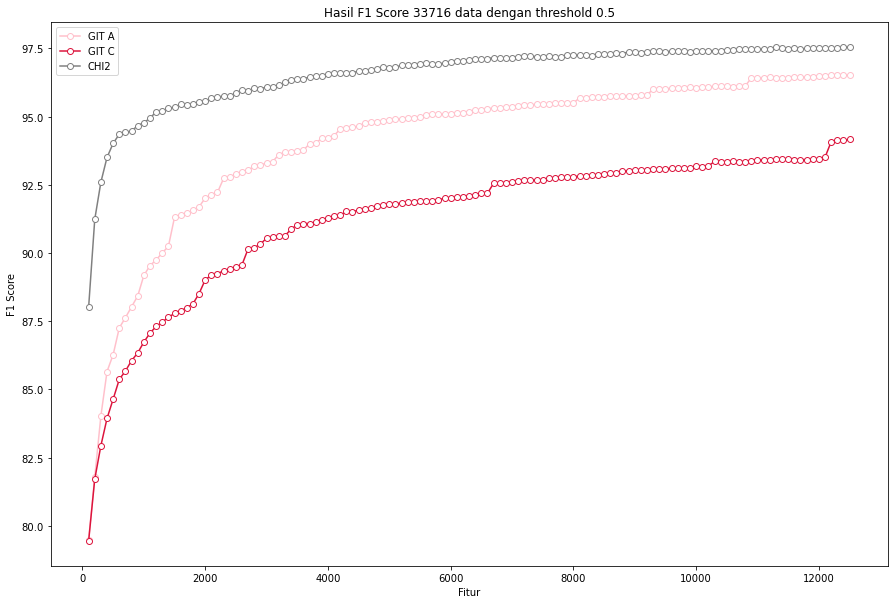

In [72]:
plt.figure(figsize=(15,10))
plt.plot(kindexa, f1a,'-ok', label = "GIT A", color='pink',markeredgecolor='pink',markerfacecolor='white') 
#plt.plot(kindexb, f1b, '-ok', label = "GIT B", color='cyan',markeredgecolor='cyan',markerfacecolor='white') 
plt.plot(kindexc, f1c,'-ok', label = "GIT C", color='crimson',markeredgecolor='crimson',markerfacecolor='white')
plt.plot(kindexchi, f1chi,'-ok', label = "CHI2", color='gray',markeredgecolor='gray',markerfacecolor='white')
# naming the x axis 
plt.xlabel('Fitur') 
# naming the y axis 
plt.ylabel('F1 Score') 
# giving a title to my graph 
plt.title('Hasil F1 Score 33716 data dengan threshold 0.5') 
# show a legend on the plot 
plt.legend()
# function to show the plot 
plt.show() 